# Prueba Tecnica

### Parte 1: Limpieza y preparación de datos.

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


Leemos los datos

In [7]:
df_vehiculos = pd.read_csv('../data/vehiculos.csv')
df_transacciones = pd.read_csv('../data/transacciones.csv')

Convertimos las columnas a minusculas

In [36]:
print("descripcion transacciones")

df_transacciones.columns = df_transacciones.columns.str.lower()
df_transacciones.head(3)

descripcion transacciones


,unnamed: 0,id_transaccion,id_vehiculo,fecha_trx,tipo_operacion,monto,tasa_interes,fecha_financiacion,id_deudor,edad_cliente,ingresos_mensuales,ciudad_cliente
0,0,8212533,HKT072,02/05/2024,Leasing,44233862,NaN,01/03/2024,8376094,51,19830708,Soacha
1,1,2098518,PSN207,19/03/2022,Credito,140719639,Premium,09/01/2022,9764948,37,10767519,Bogotá
2,2,2837633,CZC604,19/08/2024,Leasing,137998982,NaN,13/07/2024,6355349,22,7979934,Villavicencio


In [ ]:
print("descripcion vehiculos")

df_vehiculos.columns = df_vehiculos.columns.str.lower()
df_vehiculos.head(3)

descripcion vehiculos


,unnamed: 0,placa,estado_venta,marca,referencia,modelo,kilometraje,id_veh,precio_venta,clase,valor_asegurado,ciudad
0,0,ICS876,Nuevos,Byd,Song Plus Dm-i,2024,20.0,11106013,184900000.0,CAMIONETA PASAJ.,159200.0,Bucaramanga
1,1,AGT911,Nuevos,Ford,Ecosport [2],2016,2470.0,3006130,51000000.0,CAMIONETA PASAJ.,43800.0,Barranquilla
2,2,OOG319,Nuevos,Ford,Ecosport [2],2020,NaN,3008062,73400000.0,CAMPERO,71200.0,Medellín


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

Un pequeño analisis descriptivo

- Hay datos atipicos en el kilometraje se encontro una captiva con mas de 1000.000 de kilometros 
- Hay 10 carros con mas de 300mil kilometros y con menos de 10 años 
- Si el promedio de kilometraje anual es de 20mil es extraño

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [ ]:
print(df_vehiculos['kilometraje'].max())
print(df_vehiculos[df_vehiculos['kilometraje']>300000])

1300000.0
      unnamed: 0   placa estado_venta      marca   referencia  modelo  \
1247        1247  AAM494       Nuevos      Foton          Fhr    2022   
2245        2245  HTA426       Nuevos  Chevrolet      Fvr [1]    2023   
2634        2634  XLG877       Usados  Chevrolet      Captiva    2012   
3889        3889  UCS146       Nuevos      Karry         Yoyo    2023   
3902        3902  TUT053       Nuevos      Foton          Fhr    2022   
5258        5258  DSO277       Nuevos      Foton        Frr-s    2022   
5454        5454  JPC104       Nuevos      Foton          Fhr    2022   
6639        6639  NJE609       Nuevos        Kia  Picanto [3]    2023   
6890        6890  VCX888       Nuevos      Foton        Frr-s    2022   
7794        7794  IRG804       Nuevos      Karry         Yoyo    2023   
9629        9629  AWQ592       Nuevos      Foton        Frr-s    2023   

      kilometraje    id_veh  precio_venta             clase  valor_asegurado  \
1247     346002.0  18904068   102

In [80]:
print(df_vehiculos['precio_venta'].max())
# df_vehiculos.groupby('marca')['precio_venta'].sum().sort_index()
print(df_vehiculos[df_vehiculos['valor_asegurado']>100000000])

499900000.0
Empty DataFrame
Columns: [unnamed: 0, placa, estado_venta, marca, referencia, modelo, kilometraje, id_veh, precio_venta, clase, valor_asegurado, ciudad, year_vehiculo, rate_venta_asegurado]
Index: []


In [25]:
df_vehiculos.describe(include='all')

,unnamed: 0,placa,estado_venta,marca,referencia,modelo,kilometraje,id_veh,precio_venta,clase,valor_asegurado,ciudad,year_vehiculo,rate_venta_asegurado
count,10000.00000,10000,10000,9599,9599,10000.000000,2.568000e+03,1.000000e+04,9.994000e+03,9357,9357.000000,10000,10000.000000,9354.000000
unique,NaN,10000,3,63,453,NaN,NaN,NaN,NaN,14,NaN,13,NaN,NaN
top,NaN,ICS876,Nuevos,Chevrolet,Spark [3],NaN,NaN,NaN,NaN,AUTOMOVIL,NaN,Bogotá,NaN,NaN
freq,NaN,1,5000,1564,391,NaN,NaN,NaN,NaN,4465,NaN,2497,NaN,NaN
mean,4999.50000,NaN,NaN,NaN,NaN,2019.441800,3.081627e+04,6.587695e+06,7.885681e+07,NaN,67303.612269,NaN,5.558200,0.000886
std,2886.89568,NaN,NaN,NaN,NaN,3.918947,5.020515e+04,6.486819e+06,5.058012e+07,NaN,49286.165365,NaN,3.918947,0.000269
min,0.00000,NaN,NaN,NaN,NaN,1996.000000,0.000000e+00,7.700000e+01,7.500000e+06,NaN,0.000000,NaN,0.000000,0.000000
25%,2499.75000,NaN,NaN,NaN,NaN,2016.000000,8.000000e+00,2.406045e+06,4.250000e+07,NaN,36200.000000,NaN,2.000000,0.000876
50%,4999.50000,NaN,NaN,NaN,NaN,2020.000000,1.329850e+04,5.606086e+06,6.500000e+07,NaN,55600.000000,NaN,5.000000,0.000938
75%,7499.25000,NaN,NaN,NaN,NaN,2023.000000,4.676950e+04,8.008018e+06,9.833750e+07,NaN,85500.000000,NaN,9.000000,0.000997


In [62]:
df_transacciones.describe(include='all')

,unnamed: 0,id_transaccion,id_vehiculo,fecha_trx,tipo_operacion,monto,tasa_interes,fecha_financiacion,id_deudor,edad_cliente,ingresos_mensuales,ciudad_cliente
count,10000.00000,1.000000e+04,10000,10000,10000,1.000000e+04,3301,10000,1.000000e+04,10000.000000,1.000000e+04,10000
unique,NaN,NaN,10000,1458,3,NaN,3,1527,NaN,NaN,NaN,13
top,NaN,NaN,HKT072,11/09/2023,Contado,NaN,General,20/01/2022,NaN,NaN,NaN,Bogotá
freq,NaN,NaN,1,16,3364,NaN,1155,16,NaN,NaN,NaN,2461
mean,4999.50000,5.547316e+06,NaN,NaN,NaN,9.674249e+07,NaN,NaN,5.508735e+06,44.592200,1.810561e+07,NaN
std,2886.89568,2.589814e+06,NaN,NaN,NaN,3.766081e+07,NaN,NaN,2.616841e+06,13.163716,8.673702e+06,NaN
min,0.00000,1.000131e+06,NaN,NaN,NaN,2.013104e+07,NaN,NaN,1.000028e+06,22.000000,2.000354e+06,NaN
25%,2499.75000,3.325994e+06,NaN,NaN,NaN,6.565438e+07,NaN,NaN,3.214645e+06,33.000000,1.095825e+07,NaN
50%,4999.50000,5.587744e+06,NaN,NaN,NaN,9.586064e+07,NaN,NaN,5.537091e+06,44.000000,1.840310e+07,NaN
75%,7499.25000,7.784912e+06,NaN,NaN,NaN,1.260387e+08,NaN,NaN,7.775118e+06,56.000000,2.534130e+07,NaN


Vemos el tipo de datos de las variables

In [26]:
df_vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unnamed: 0            10000 non-null  int64  
 1   placa                 10000 non-null  object 
 2   estado_venta          10000 non-null  object 
 3   marca                 9599 non-null   object 
 4   referencia            9599 non-null   object 
 5   modelo                10000 non-null  int64  
 6   kilometraje           2568 non-null   float64
 7   id_veh                10000 non-null  int64  
 8   precio_venta          9994 non-null   float64
 9   clase                 9357 non-null   object 
 10  valor_asegurado       9357 non-null   float64
 11  ciudad                10000 non-null  object 
 12  year_vehiculo         10000 non-null  int64  
 13  rate_venta_asegurado  9354 non-null   float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.1+ MB


In [64]:
df_transacciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   unnamed: 0          10000 non-null  int64 
 1   id_transaccion      10000 non-null  int64 
 2   id_vehiculo         10000 non-null  object
 3   fecha_trx           10000 non-null  object
 4   tipo_operacion      10000 non-null  object
 5   monto               10000 non-null  int64 
 6   tasa_interes        3301 non-null   object
 7   fecha_financiacion  10000 non-null  object
 8   id_deudor           10000 non-null  int64 
 9   edad_cliente        10000 non-null  int64 
 10  ingresos_mensuales  10000 non-null  int64 
 11  ciudad_cliente      10000 non-null  object
dtypes: int64(6), object(6)
memory usage: 937.6+ KB


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

Es raro que de 10000 registros 7432 no tengan datos del kilometraje

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [28]:
# Valores faltantes o raros
print(df_vehiculos.shape)
df_vehiculos.isnull().sum()

(10000, 14)


unnamed: 0                 0
placa                      0
estado_venta               0
marca                    401
referencia               401
modelo                     0
kilometraje             7432
id_veh                     0
precio_venta               6
clase                    643
valor_asegurado          643
ciudad                     0
year_vehiculo              0
rate_venta_asegurado     646
dtype: int64

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

Creamos nuevas columnas como los años del vehiculos comparando el 2025 como año base y podriamos ver por la ley colombiana la depreciacion del vehiculo al después de 5 años se debe hacer la tecnomecanica...

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [ ]:
# Nuevas columnas 
df_vehiculos['year_vehiculo'] = 2025 - df_vehiculos['modelo']

df_vehiculos['year_vehiculo'].value_counts().sort_index()

year_vehiculo
0      510
1      666
2     1455
3     1635
4      558
5      821
6      683
7      533
8      617
9      642
10     571
11     334
12     382
13     298
14     215
15      49
16       7
17       8
18       1
20       2
21       1
22       2
23       2
24       1
26       2
27       2
29       3
Name: count, dtype: int64

In [20]:
df_vehiculos['rate_venta_asegurado'] = df_vehiculos['valor_asegurado']/df_vehiculos['precio_venta']

<function matplotlib.pyplot.show(close=None, block=None)>

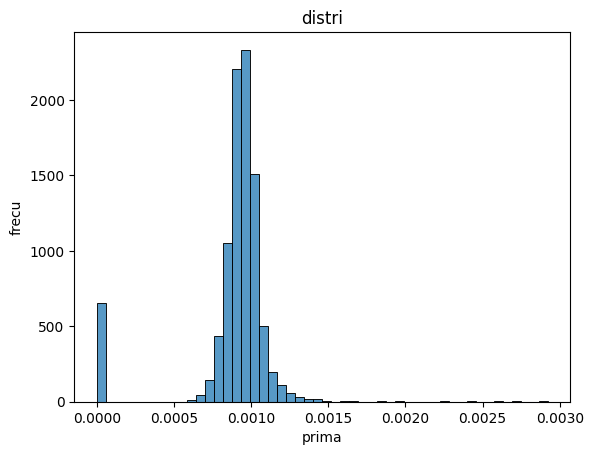

In [32]:
sns.histplot(df_vehiculos['rate_venta_asegurado'],bins=50 )
plt.title("distri")
plt.xlabel("prima")
plt.ylabel("frecu")
plt.show

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

La mayoria de los datos se distribuyen entre los 0.1% 
Es decir que la prima de seguro no alcanza ni el 1% del valor comercial del vehiculo
Lo que me hace pensar que esa prima es mensual y no anual como normalmente se cobra

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [ ]:
df_vehiculos[df_vehiculos['valor_asegurado'].isna()]['marca'].value_counts().head(3)

marca
Kia        124
Mazda      116
Renault     76
Name: count, dtype: int64

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

Al parecer del dataset 10mil registros el top 3 de carros con mayor cantidad de valor asegurado en null son 
Kia
Mazda
Renault

Son las marcas mas comerciales en colombia

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [60]:
# df_transacciones.info()
# df_vehiculos
# df_vehiculos['placa'] = df_vehiculos['placa'].str.upper() 
# df_transacciones['id_vehiculo'] = df_vehiculos['id_vehiculo'].str.lower()

df_union = pd.merge(df_vehiculos, df_transacciones, left_on= 'placa', right_on = 'id_vehiculo', how= 'left')

In [61]:
df_union

,unnamed: 0_x,placa,estado_venta,marca,referencia,modelo,kilometraje,id_veh,precio_venta,clase,...,id_vehiculo,fecha_trx,tipo_operacion,monto,tasa_interes,fecha_financiacion,id_deudor,edad_cliente,ingresos_mensuales,ciudad_cliente
0,0,ICS876,Nuevos,Byd,Song Plus Dm-i,2024,20.0,11106013,184900000.0,CAMIONETA PASAJ.,...,ICS876,22/06/2021,Credito,39139957,Premium,14/03/2021,1044424,33,15413446,Medellín
1,1,AGT911,Nuevos,Ford,Ecosport [2],2016,2470.0,3006130,51000000.0,CAMIONETA PASAJ.,...,AGT911,03/04/2021,Contado,146048416,NaN,26/01/2021,3212660,55,29601498,Bogotá
2,2,OOG319,Nuevos,Ford,Ecosport [2],2020,NaN,3008062,73400000.0,CAMPERO,...,OOG319,18/12/2024,Credito,68060951,Preferencial,31/08/2024,7504401,53,16875219,Santa Marta
3,3,WGR685,Usados,Renault,Koleos [1],2014,NaN,8006038,49800000.0,CAMIONETA PASAJ.,...,WGR685,27/06/2023,Leasing,128279228,NaN,22/05/2023,2966570,29,5246600,Medellín
4,4,YMC152,Usados,Renault,Logan [2],2017,12522.0,8001187,35100000.0,AUTOMOVIL,...,YMC152,28/12/2021,Credito,184907732,Preferencial,13/10/2021,7097710,58,25707419,Cartagena
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,QSB799,Nuevos,Karry,Yoyo,2023,NaN,41807001,62482500.0,CAMIONETA REPAR,...,QSB799,11/08/2022,Leasing,148943135,NaN,08/06/2022,7596212,24,14165744,Santa Marta
9996,9996,HFC156,Usados,Kia,Picanto [3],2021,NaN,4601251,45900000.0,AUTOMOVIL,...,HFC156,29/05/2021,Credito,149495575,Premium,07/02/2021,4473721,46,26431803,Medellín
9997,9997,IAC386,Nuevos,Nissan,Qashqai [3],2019,NaN,6406136,83400000.0,CAMIONETA PASAJ.,...,IAC386,21/05/2022,Leasing,77056123,NaN,01/02/2022,1643505,33,24577188,Cali
9998,9998,NYT057,Nuevos,Nissan,Versa [2],2022,NaN,6401248,66490000.0,AUTOMOVIL,...,NYT057,16/09/2021,Leasing,27377905,NaN,14/08/2021,7975881,35,27626876,Bogotá


### Parte 2:  Análisis exploratorio y Visualización. 

In [89]:
print (df_transacciones.columns)
print (df_vehiculos.columns)

Index(['unnamed: 0', 'id_transaccion', 'id_vehiculo', 'fecha_trx',
       'tipo_operacion', 'monto', 'tasa_interes', 'fecha_financiacion',
       'id_deudor', 'edad_cliente', 'ingresos_mensuales', 'ciudad_cliente'],
      dtype='object')
Index(['unnamed: 0', 'placa', 'estado_venta', 'marca', 'referencia', 'modelo',
       'kilometraje', 'id_veh', 'precio_venta', 'clase', 'valor_asegurado',
       'ciudad', 'year_vehiculo', 'rate_venta_asegurado'],
      dtype='object')


In [90]:
df_vehiculos.columns= df_vehiculos.columns.str.strip().str.lower()
df_transacciones.columns=df_transacciones.columns.str.strip().str.lower()

In [125]:
df_vehiculos['placa']= df_vehiculos['placa'].astype(str).str.lower()
df_transacciones['id_vehiculo']=df_transacciones['id_vehiculo'].astype(str).str.lower()

In [128]:
df= df_transacciones.merge(df_vehiculos, left_on='id_vehiculo', right_on='placa', how='inner')

In [101]:
print(df.columns)

Index(['unnamed: 0_x', 'id_transaccion', 'id_vehiculo', 'fecha_trx',
       'tipo_operacion', 'monto', 'tasa_interes', 'fecha_financiacion',
       'id_deudor', 'edad_cliente', 'ingresos_mensuales', 'ciudad_cliente',
       'unnamed: 0_y', 'placa', 'estado_venta', 'marca', 'referencia',
       'modelo', 'kilometraje', 'id_veh', 'precio_venta', 'clase',
       'valor_asegurado', 'ciudad', 'year_vehiculo', 'rate_venta_asegurado'],
      dtype='object')


In [129]:
df[['clase','precio_venta']].isnull().sum

<bound method DataFrame.sum of       clase  precio_venta
0     False         False
1     False         False
2     False         False
3     False         False
4     False         False
...     ...           ...
9995  False         False
9996  False         False
9997  False         False
9998  False         False
9999  False         False

[10000 rows x 2 columns]>

In [130]:
df_filtrado= df.dropna(subset=['clase','precio_venta'])

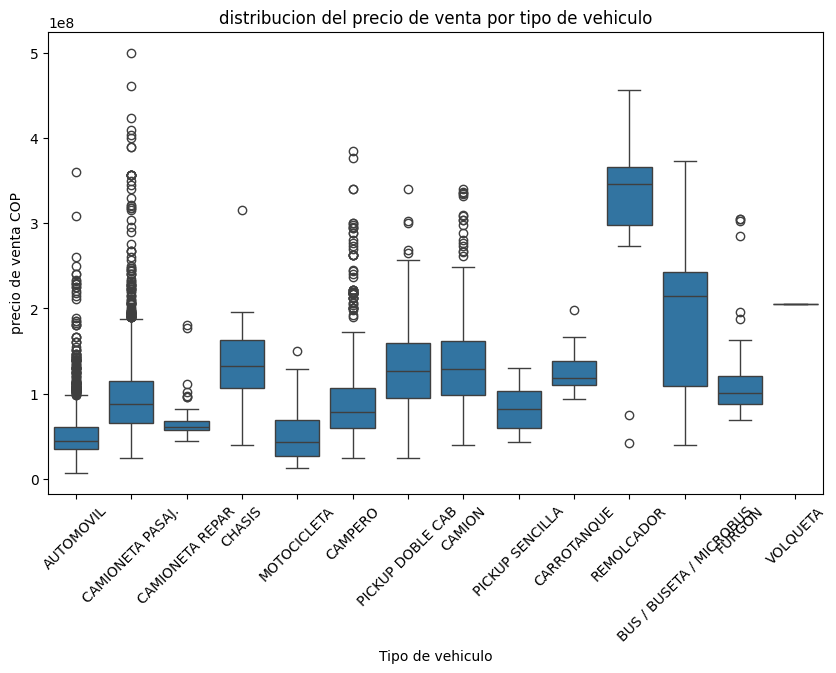

In [131]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='clase', y='precio_venta')
plt.title('distribucion del precio de venta por tipo de vehiculo')
plt.xlabel('Tipo de vehiculo')
plt.ylabel('precio de venta COP')
plt.xticks(rotation=45)
plt.show()

In [132]:
df['relacion_asegurado_comercial']= df['valor_asegurado']/df['precio_venta']

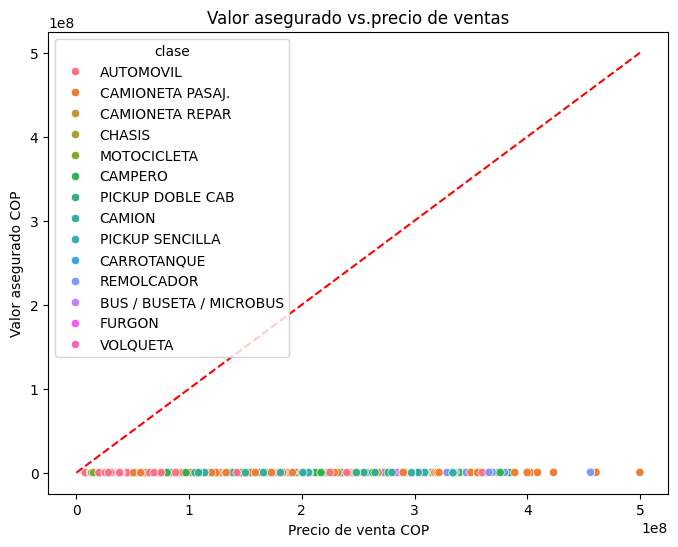

In [133]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='precio_venta', y='valor_asegurado', hue='clase')
plt.plot([0,df['precio_venta'].max()],[0,df['precio_venta'].max()], 'r--')
plt.title('Valor asegurado vs.precio de ventas')
plt.xlabel('Precio de venta COP')
plt.ylabel('Valor asegurado COP')
plt.legend(title='clase')
plt.show()

In [138]:
df['rate_venta_asegurado'].describe()

count    9354.000000
mean        0.000886
std         0.000269
min         0.000000
25%         0.000876
50%         0.000938
75%         0.000997
max         0.002923
Name: rate_venta_asegurado, dtype: float64

In [139]:
df.head(2)

,unnamed: 0_x,id_transaccion,id_vehiculo,fecha_trx,tipo_operacion,monto,tasa_interes,fecha_financiacion,id_deudor,edad_cliente,ingresos_mensuales,ciudad_cliente,unnamed: 0_y,placa,estado_venta,marca,referencia,modelo,kilometraje,id_veh,precio_venta,clase,valor_asegurado,ciudad,year_vehiculo,rate_venta_asegurado,relacion_asegurado_comercial
0,0,8212533,hkt072,02/05/2024,Leasing,44233862,NaN,01/03/2024,8376094,51,19830708,Soacha,4402,hkt072,Usados,NaN,NaN,2020,57727.0,6401228,46000000.0,AUTOMOVIL,47100.0,Medellín,5,0.001024,0.001024
1,1,2098518,psn207,19/03/2022,Credito,140719639,Premium,09/01/2022,9764948,37,10767519,Bogotá,5140,psn207,Nuevos,Nissan,Kicks,2019,0.0,6406132,84000000.0,CAMIONETA PASAJ.,68800.0,Cartagena,6,0.000819,0.000819


In [ ]:
df['tasa_interes'].value_counts()

df['valor_real'] = df['monto'] - df['precio_venta']


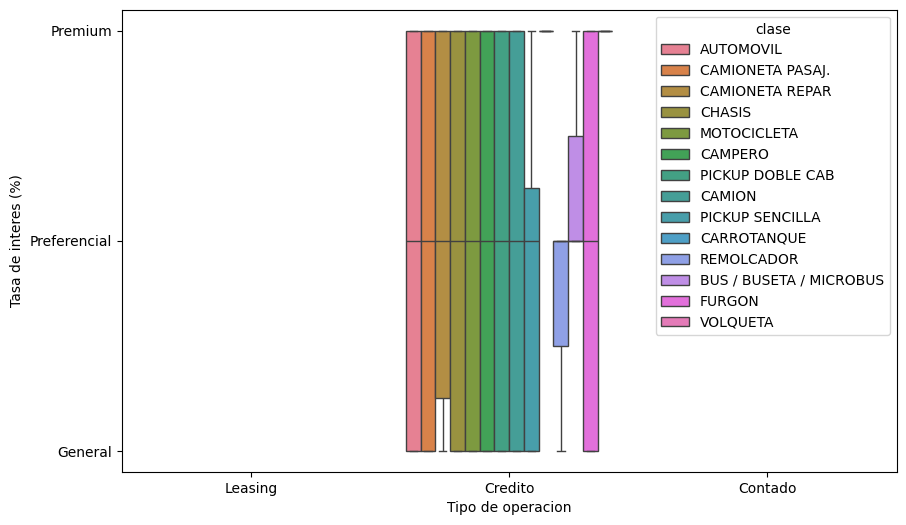

In [143]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='tipo_operacion', y='tasa_interes', hue='clase')
plt.xlabel('Tipo de operacion')
plt.ylabel('Tasa de interes (%)')
plt.legend(title='clase')
plt.show()